In [1]:
pip install Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Escalado de Datos
from sklearn.preprocessing import StandardScaler

#Polynomial
from sklearn.preprocessing import PolynomialFeatures

#Models
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

#Metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = '/content/drive/MyDrive/Data/properati.csv'
data = pd.read_csv(url)

In [3]:
def valores_nulos(dataset):
  print('<------------->')
  print('Porcentaje de Valores nulos\n')
  print(dataset.isnull().sum() / dataset.shape[0] * 100)

https://medium.com/@manilwagle/predicting-house-prices-using-machine-learning-cab0b82cd3f

https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac



# Filtrado de Información

Empleo el mismo filtro que se solicitaba en el Proyecto 1, en donde se emplea únicamente los Datos de propiedades registradas en Capital Federal.

In [4]:
data_ml=data[(data.l2 == 'Capital Federal') & (data.property_type.isin(['Departamento', 'Casa', 'PH']))]

In [5]:
data_ml = data_ml[(data_ml.surface_total >= 15)] 
data_ml = data_ml[(data_ml.surface_total <= 1000)]
print('valor minimo en superficie total', data_ml.surface_total.min())
print('valor maximo en superficie total', data_ml.surface_total.max())

valor minimo en superficie total 15.0
valor maximo en superficie total 1000.0


In [6]:
data_ml = data_ml[(data_ml.price <= 4000000 )]

In [7]:
data_ml = data_ml[['l3','property_type','rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

In [8]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.000000
property_type      0.000000
rooms              0.000000
bathrooms          1.068311
surface_total      0.000000
surface_covered    0.627633
price              0.000000
dtype: float64


In [9]:
#¿Presencia de valores invertidos?
datos_invertidos= data_ml.loc[data_ml.surface_total < data_ml.surface_covered]
print('Existen', len(datos_invertidos),'datos invertidos')

Existen 751 datos invertidos


In [10]:
#Limpieza de valores invertidos
data_ml = data_ml[(data_ml.surface_total >= data_ml.surface_covered)]

In [11]:
#Comprobación 
datos_invertidos_2= data_ml.loc[data_ml.surface_total < data_ml.surface_covered]
print('Existen', len(datos_invertidos_2),'datos invertidos')

Existen 0 datos invertidos


In [12]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.000000
property_type      0.000000
rooms              0.000000
bathrooms          1.022132
surface_total      0.000000
surface_covered    0.000000
price              0.000000
dtype: float64


In [13]:
#Eliminar informacion duplicada
data_ml.drop_duplicates(inplace=True)

In [14]:
#Copia
data_py2 = data_ml.copy()

#EDA

## Imputación de Valores faltantes

In [15]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.00000
property_type      0.00000
rooms              0.00000
bathrooms          1.47145
surface_total      0.00000
surface_covered    0.00000
price              0.00000
dtype: float64


In [16]:
#Elimino valores nulos en dataset copia
data_py2.dropna(inplace=True)

In [17]:
#Agrupación segun el tipo de propiedad
mean_bt = data_py2.groupby('property_type')['bathrooms'].mean().round(0)

In [18]:
mean_bt = dict(round(mean_bt))
mean_bt

{'Casa': 2.0, 'Departamento': 2.0, 'PH': 1.0}

In [19]:
data_ml.bathrooms = data_ml.bathrooms.fillna(data_ml.property_type.map(mean_bt))

In [20]:
valores_nulos(data_ml)

<------------->
Porcentaje de Valores nulos

l3                 0.0
property_type      0.0
rooms              0.0
bathrooms          0.0
surface_total      0.0
surface_covered    0.0
price              0.0
dtype: float64


In [22]:
break

SyntaxError: ignored

# Intento

https://github.com/traintestbritt/predicting_house_prices/blob/master/notebook-house_price_predictions-brittany_allen.ipynb

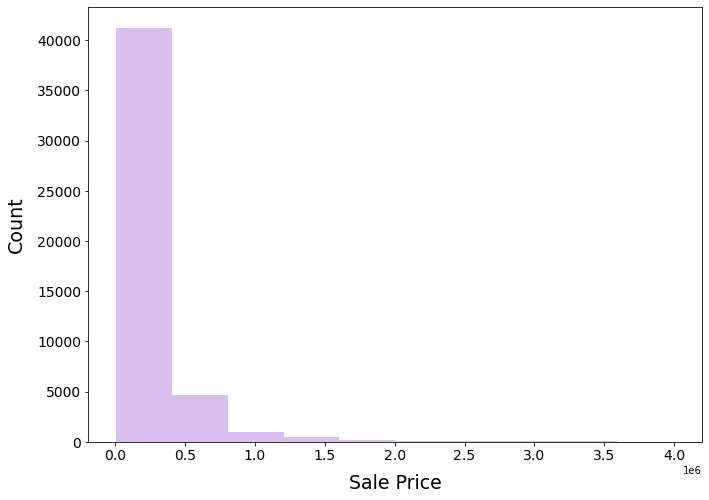

In [21]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(data_ml.price, kde=False, color='#A15EDB', bins=10)

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

In [22]:
data_ml.price.describe()

count    4.777600e+04
mean     2.638013e+05
std      2.914023e+05
min      6.000000e+03
25%      1.230000e+05
50%      1.780000e+05
75%      2.890000e+05
max      4.000000e+06
Name: price, dtype: float64

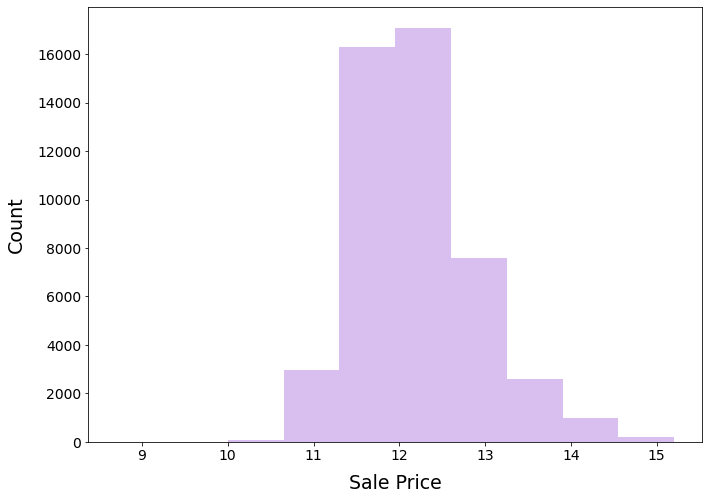

In [23]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(np.log(data_ml.price), kde=False, color='#A15EDB', bins=10)

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

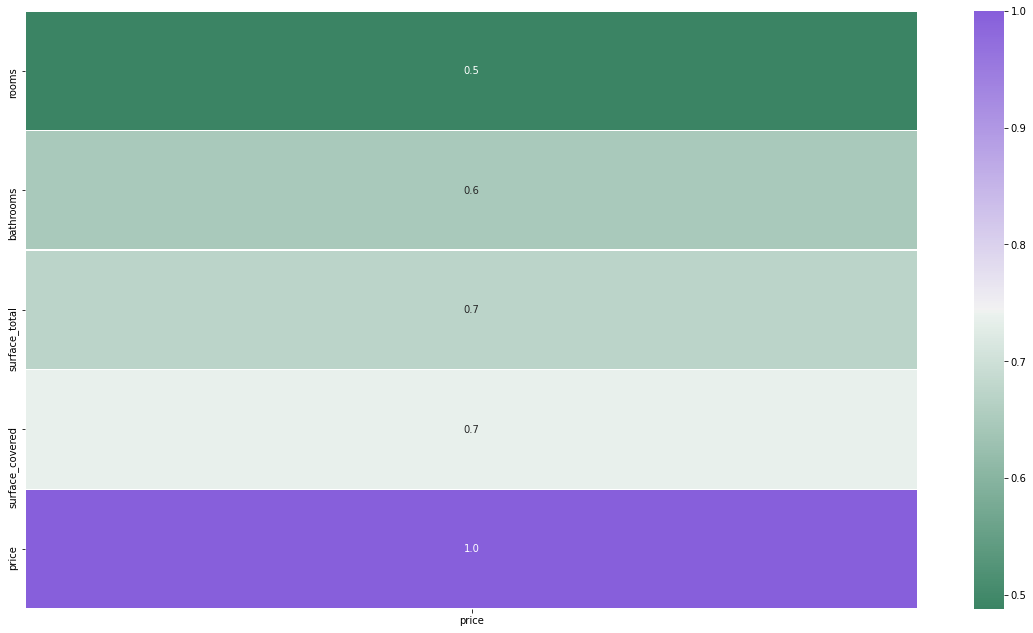

In [24]:
fig, ax = plt.subplots(figsize = (20, 11))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(data_ml.corr()[['price']][round(data_ml.corr()['price'].sort_values(ascending=False), 1) >= .5], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);

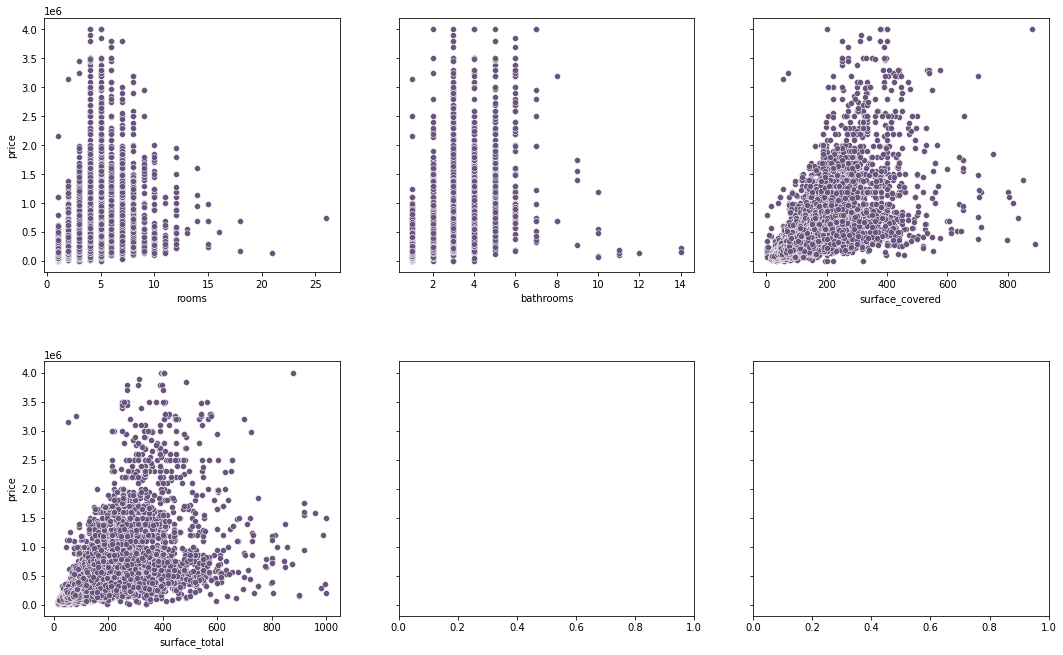

In [25]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
#sns.set(font_scale=.5)

sns.scatterplot(x=data_ml.rooms, y=data_ml.price, ax=ax[0, 0], color='#69547C', )
sns.scatterplot(x=data_ml.bathrooms, y=data_ml.price, ax=ax[0, 1], color='#69547C')
sns.scatterplot(x=data_ml.surface_covered, y=data_ml.price, ax=ax[0, 2], color='#69547C')
sns.scatterplot(x=data_ml.surface_total, y=data_ml.price, ax=ax[1, 0], color='#69547C')



In [26]:
data_ml.price = data_ml.price.map(np.log)

In [27]:
data_ml.head(2)

,l3,property_type,rooms,bathrooms,surface_total,surface_covered,price
0,San Cristobal,Departamento,7.0,2.0,140.0,140.0,11.938193
1,Boedo,PH,2.0,2.0,70.0,58.0,11.976659


In [28]:
data_ml._get_numeric_data().columns

Index(['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'], dtype='object')

In [29]:
#Separo datos en X e Y
X = data_ml[['rooms', 'bathrooms', 'surface_total', 'surface_covered']]
Y = data_ml[['price']]

In [30]:
X.shape, Y.shape

((47776, 4), (47776, 1))

# Polynomial Features

In [31]:
poly = PolynomialFeatures(degree=2)

In [32]:
features_poly = poly.fit_transform(X)

In [33]:
poly_df = pd.DataFrame(features_poly, columns=poly.get_feature_names())

In [34]:
poly_df.head(2)

,1,x0,x1,x2,x3,x0^2,x0 x1,x0 x2,x0 x3,x1^2,x1 x2,x1 x3,x2^2,x2 x3,x3^2
0,1.0,7.0,2.0,140.0,140.0,49.0,14.0,980.0,980.0,4.0,280.0,280.0,19600.0,19600.0,19600.0
1,1.0,2.0,2.0,70.0,58.0,4.0,4.0,140.0,116.0,4.0,140.0,116.0,4900.0,4060.0,3364.0


In [35]:
poly_df.shape

(47776, 15)

## Escalado de Datos

In [36]:
std = StandardScaler()

In [37]:
std.fit(poly_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
data_escalada = std.transform(poly_df)

In [39]:
data_escalada = pd.DataFrame(data_escalada)

In [40]:
data_escalada.shape

(47776, 15)

##Enconding

In [41]:
l3 = data_ml['l3']

In [42]:
l3_get = pd.get_dummies(l3, prefix=('x'))

In [43]:
data_escalada.reset_index(drop=True, inplace=True)
l3_get.reset_index(drop=True, inplace=True)

In [44]:
data_escalada.shape, l3_get.shape

((47776, 15), (47776, 57))

In [45]:
data_eda = pd.merge(data_escalada, l3_get, how='left', left_index=True, right_index=True)

##Modelos

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data_eda, Y,
                                                    test_size=0.25,
                                                    random_state=40)

In [58]:
def evaluar_modelo(modelo,X_train,X_test,y_train,y_test):
    modelo.fit(X_train,y_train)
    print ("* R2 del modelo  en train:", modelo.score(X_train,y_train) )
    print('RMSE en train:',np.sqrt(mean_squared_error(y_train, modelo.predict(X_train))))
    print ("* R2 del modelo en test:", modelo.score(X_test,y_test) )
    print('RMSE en test:',np.sqrt(mean_squared_error(y_test, modelo.predict(X_test))))

In [48]:
linear = LinearRegression()

In [49]:
evaluar_modelo(linear, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.8357361103470271
RMSE en train: 0.27918243316348434
R2 del modelo en test: 0.8370873919713756
RMSE en test: 0.27593304069680064


In [50]:
ridge = RidgeCV()

In [51]:
evaluar_modelo(ridge, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.8357339341042005
RMSE en train: 0.2791842825253753
R2 del modelo en test: 0.8370984984665983
RMSE en test: 0.2759236347297919


In [52]:
lasso = LassoCV()

In [53]:
evaluar_modelo(lasso, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.8321731158935399
RMSE en train: 0.2821940174983779
R2 del modelo en test: 0.8334610046816809
RMSE en test: 0.2789872325172459


In [54]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [55]:
evaluar_modelo(clf, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.905172234685945
RMSE en train: 0.21212155144011297
R2 del modelo en test: 0.8745708538472357
RMSE en test: 0.24211717143340006


In [56]:
from sklearn.svm import SVR
super_regresor = SVR()

In [57]:
evaluar_modelo(super_regresor, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.8797657191521586
RMSE en train: 0.2388532702565442
R2 del modelo en test: 0.8671037501189993
RMSE en test: 0.2492199024244154


In [60]:
from sklearn.ensemble import ExtraTreesRegressor
tree_reg = ExtraTreesRegressor(n_estimators=100, random_state=40)

In [61]:
evaluar_modelo(tree_reg, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.9812486138009185
RMSE en train: 0.09432650126948647
* R2 del modelo en test: 0.863328152036683
RMSE en test: 0.2527352924880494


In [62]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()

In [63]:
evaluar_modelo(reg, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.8357331668752006
RMSE en train: 0.27918493451039295
* R2 del modelo en test: 0.837099923165353
RMSE en test: 0.2759224281450934


In [66]:
from sklearn.ensemble import RandomForestRegressor
regg = RandomForestRegressor(n_estimators=150)

In [67]:
evaluar_modelo(regg, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.9686494280347772
RMSE en train: 0.12196627806296081
* R2 del modelo en test: 0.8726557996405104
RMSE en test: 0.24395849414177592


In [68]:
from xgboost.sklearn import XGBRegressor
xg_reg = XGBRegressor()

In [69]:
evaluar_modelo(xg_reg, X_train, X_test, y_train, y_test)

[00:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
* R2 del modelo  en train: 0.8549087306129131
RMSE en train: 0.26238419839433375
* R2 del modelo en test: 0.8496470006217101
RMSE en test: 0.2650833233768395


In [70]:
from sklearn.linear_model import ElasticNetCV
elas = ElasticNetCV(cv=5, max_iter=1e7)

In [71]:
evaluar_modelo(elas, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.8310060784626451
RMSE en train: 0.2831734804673766
* R2 del modelo en test: 0.832264172337082
RMSE en test: 0.2799879086477752


#Voting

In [73]:
from sklearn.ensemble import VotingRegressor


vote_mod = VotingRegressor([('Ridge', ridge), ('RandomForestRegressor', regg), ('Elastic', elas), 
                            ('ExtraTreesRegressor', tree_reg)])

In [74]:
evaluar_modelo(vote_mod, X_train, X_test, y_train, y_test)

* R2 del modelo  en train: 0.9364328372231856
RMSE en train: 0.1736734576258764
* R2 del modelo en test: 0.8753952599070299
RMSE en test: 0.24132017993120947


In [75]:
from mlxtend.regressor import StackingRegressor

In [76]:
stregr = StackingRegressor(regressors=[xg_reg,vote_mod, tree_reg, regg], 
                           meta_regressor=clf, use_features_in_secondary=True
                          )

In [77]:
evaluar_modelo(stregr, X_train, X_test, y_train, y_test)

[00:52:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
* R2 del modelo  en train: 0.9812466710858812
RMSE en train: 0.09433138743535179
* R2 del modelo en test: 0.8633244846899799
RMSE en test: 0.25273868331702365


https://github.com/Shreyas3108/house-price-prediction/blob/master/housesales.ipynb

# Red neuronal

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlpr = MLPRegressor(
    solver='adam',
    alpha=1e-5,
    hidden_layer_sizes=(3,3),
    random_state=40)

In [ ]:
mlpr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(3, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=40, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
mlpr.score(X_train, y_train)

0.862187911506027

In [ ]:
mlpr.score(X_test, y_test)

0.8579904375350935

In [ ]:
evaluar_modelo(mlpr, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.862187911506027
RMSE en train: 0.2557176436594812
R2 del modelo en test: 0.8579904375350935
RMSE en test: 0.2576233085009852


In [ ]:
#Tomo una muestra de mis datos en Test
idxs = np.random.randint(X_test.shape[0], size=10)
idxs

array([3186, 7621, 4466, 1150, 2495, 9540, 8595, 1856, 6865, 3728])

In [ ]:
muestra = X_test.iloc[idxs]
prediccion = model.predict(muestra)
prediccion

array([[12.364413],
       [12.187061],
       [12.240018],
       [12.017933],
       [11.632652],
       [12.170994],
       [11.217239],
       [11.337101],
       [12.058702],
       [13.019316]], dtype=float32)

In [ ]:
valor_data = []
for i in idxs:
    valor_real = y_test.price.iloc[i]
    valor_data.append(valor_real)

In [ ]:
valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)
comparacion

,valor_real,valor_predicho
0,12.267638,12.364413
1,12.206073,12.187061
2,12.154779,12.240018
3,11.813030,12.017933
4,11.561716,11.632652
5,11.835009,12.170994
6,11.461632,11.217239
7,11.154821,11.337101
8,12.203570,12.058702
9,12.994530,13.019316


Text(0, 0.5, 'Precio')

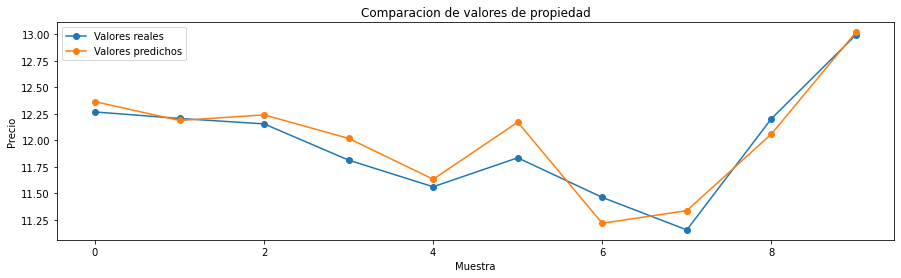

In [ ]:
r = comparacion['valor_real']
p = comparacion['valor_predicho']
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.title('Comparacion de valores de propiedad')
plt.xlabel('Muestra')
plt.ylabel('Precio')

##Keras

https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

In [ ]:
pip install Keras

In [ ]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.0


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4672      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.01592389],
       [ 0.15945604],
       [ 0.18633921],
       [ 0.12339719],
       [ 0.04706358],
       [-0.00436921],
       [-0.03465565],
       [ 0.1115123 ],
       [ 0.06944402],
       [ 0.27552816]], dtype=float32)

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

374/374 - 0s - loss: 0.0679 - mae: 0.1911 - mse: 0.0679
Testing set Mean Abs Error:  0.19 MPG


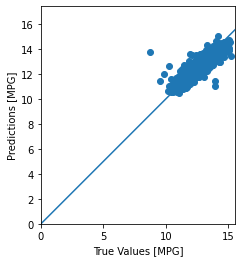

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
p = model.predict(X_test[0:10])
r = y_test[0:10]

Text(0, 0.5, 'Precio')

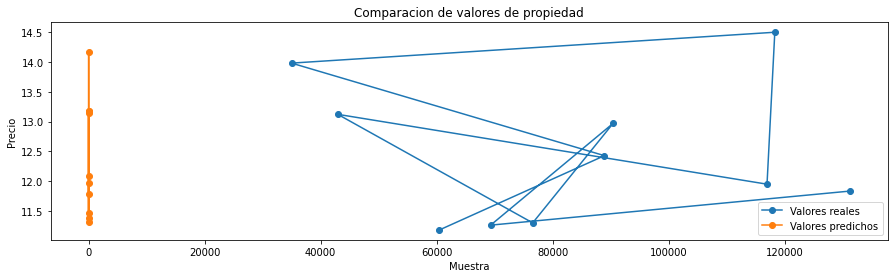

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.title('Comparacion de valores de propiedad')
plt.xlabel('Muestra')
plt.ylabel('Precio')

#Keras

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_05_3_keras_l1_l2.ipynb

In [58]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False


Note: using Google CoLab


In [71]:
from sklearn import  metrics
from scipy.stats import zscore
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

In [70]:
import tensorflow as tf

In [159]:
x_train1= X_train.values.tolist()
y_train1 = y_train.values.tolist()

In [160]:
x_test1 = X_test.values.tolist()
y_test1 = y_test.values.tolist()

In [135]:
model = Sequential()
model.add(Dense(10, input_dim=72, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train1, y_train1,verbose=2,epochs=100)

1120/1120 - 1s - loss: 0.0634
Epoch 92/100
1120/1120 - 1s - loss: 0.0635
Epoch 93/100
1120/1120 - 1s - loss: 0.0632
Epoch 94/100
1120/1120 - 1s - loss: 0.0635
Epoch 95/100
1120/1120 - 1s - loss: 0.0632
Epoch 96/100
1120/1120 - 1s - loss: 0.0636
Epoch 97/100
1120/1120 - 1s - loss: 0.0635
Epoch 98/100
1120/1120 - 1s - loss: 0.0633
Epoch 99/100
1120/1120 - 1s - loss: 0.0636
Epoch 100/100
1120/1120 - 1s - loss: 0.0638


In [136]:
#Tomo una muestra de mis datos en Test
idxs = np.random.randint(X_test.shape[0], size=10)
idxs

array([ 6494,  7171, 11809, 11546,  7062,  5263,  4901,  2840,  6070,
        2774])

In [137]:
muestra = X_test.iloc[idxs]
prediccion = model.predict(muestra)
prediccion

array([[12.15575 ],
       [13.110488],
       [11.921478],
       [12.118207],
       [11.420511],
       [11.931536],
       [12.476576],
       [12.40542 ],
       [13.346796],
       [11.956136]], dtype=float32)

In [138]:
valor_data = []
for i in idxs:
    valor_real = y_test.price.iloc[i]
    valor_data.append(valor_real)

In [139]:
valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)
comparacion

,valor_real,valor_predicho
0,12.409013,12.155750
1,13.171154,13.110488
2,12.095141,11.921478
3,12.099600,12.118207
4,10.985293,11.420511
5,12.230765,11.931536
6,12.409013,12.476576
7,12.560244,12.405420
8,13.392391,13.346796
9,12.468437,11.956136


Text(0, 0.5, 'Precio')

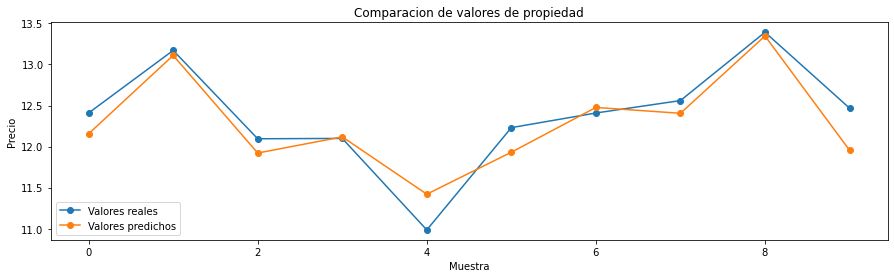

In [140]:
r = comparacion['valor_real']
p = comparacion['valor_predicho']
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.title('Comparacion de valores de propiedad')
plt.xlabel('Muestra')
plt.ylabel('Precio')

In [141]:
pred = model.predict(x_test1)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test1))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.25149762745175397


In [161]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [163]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [165]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
kfold = KFold(n_splits=10, random_state=40)
results = cross_val_score(estimator, x_train, y_train1, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

estimator.fit(x_train1, y_train1)
prediction = estimator.predict(x_test1)
accuracy_score(y_test1, prediction)

Results: nan (nan) MSE


ValueError: ignored

## Escalado de Datos


In [ ]:
X_escalada = data_ml[['rooms', 'bathrooms', 'surface_total', 'surface_covered']]
Y_escalada = data_ml[['price']]

In [ ]:
std = StandardScaler()
#Entreno el modelo
std.fit(X_escalada)

In [ ]:
#Escalado
X_escalada_new = std.transform(X_escalada)

In [ ]:
#Convierto a Dataframe
X_escalada_new = pd.DataFrame(data=X_escalada_new, columns=['rooms', 'bathrooms','surface_total','surface_covered'])

In [ ]:
X_escalada_new.head(2)

In [ ]:
std.fit(Y_escalada)
Y_escalada_new = std.transform(Y_escalada)

In [ ]:
Y_escalada_new = pd.DataFrame(data=Y_escalada_new, columns=['price'])

##Eliminar Outliers

In [ ]:
def limpiar_dataframe(dataframe, columna):
    q25, q75 = np.percentile(dataframe[columna], [25, 75])
    iqr = q75 - q25
    if (q25 -(1.5 * iqr)) < 0:
        IQMenor = 0.0
    else:
        IQMenor = float(q25 - (1.5 * iqr))

    IQMayor = float(q75 + (1.5 * iqr))
    
    dataframe = dataframe[(dataframe[columna] > IQMenor ) &
        (dataframe[columna] < IQMayor)]
    
    return dataframe

In [ ]:
data_columnas = ['rooms','bathrooms','surface_total','surface_covered']
for i in data_columnas:
    X_escalada_new = limpiar_dataframe(X_escalada,i)

In [ ]:
sns.kdeplot((X_escalada_new['surface_total']))

In [ ]:
sns.kdeplot((X_escalada_new['rooms']))

In [ ]:
sns.kdeplot((X_escalada_new['surface_total']))
sns.kdeplot((X_escalada_new['rooms']))
sns.kdeplot((X_escalada_new['bathrooms']))
sns.kdeplot((X_escalada_new['surface_covered']))
plt.title('Rango de valores Datos Escalados')

Obtener importancia de caracteristicas
https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

-> optimizacion bayesiana

-> open street maps api (Para obtener cosas de plusvalia segun cordenadas)

-> Probar super Vector Regresor

-> Probar extra modelo 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

-> Keras Regresor
https://www.kaggle.com/hendraherviawan/regression-with-kerasregressor
https://stackoverflow.com/questions/44132652/keras-how-to-perform-a-prediction-using-kerasregressor
https://www.heatonresearch.com/2017/07/22/keras-getting-started.html
https://github.com/jeffheaton/t81_558_deep_learning

-> Staking
https://www.kaggle.com/amiiiney/price-prediction-regularization-gbms